In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [3]:
trainset='../input/fuirt-dataset/Training'

In [4]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2,rotation_range=0.5,
                                    zoom_range=0.5,
                                    height_shift_range=0.5,
                                    width_shift_range=0.5,
                                    brightness_range=(0.8, 1.2))

In [5]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                             32                   batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 4479 images belonging to 10 classes.
Found 1116 images belonging to 10 classes.


In [ ]:
validation_set.class_indices

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.35))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='Softmax'))
model.summary()
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

2022-05-19 13:14:12.096576: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [10]:
model.fit(train_dataset,batch_size=128,epochs=20,verbose=1,validation_data=validation_set)


2022-05-19 13:14:43.990802: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
35/35 [==============================] - 100s 3s/step - loss: 2.5427 - accuracy: 0.1893 - val_loss: 2.1806 - val_accuracy: 0.3118
Epoch 2/20
35/35 [==============================] - 93s 3s/step - loss: 1.9974 - accuracy: 0.3208 - val_loss: 2.0220 - val_accuracy: 0.1685
Epoch 3/20
35/35 [==============================] - 94s 3s/step - loss: 1.9181 - accuracy: 0.3255 - val_loss: 1.6715 - val_accuracy: 0.4444
Epoch 4/20
35/35 [==============================] - 94s 3s/step - loss: 1.4769 - accuracy: 0.4820 - val_loss: 1.1669 - val_accuracy: 0.6335
Epoch 5/20
35/35 [==============================] - 94s 3s/step - loss: 1.1388 - accuracy: 0.5796 - val_loss: 0.9769 - val_accuracy: 0.6022
Epoch 6/20
35/35 [==============================] - 94s 3s/step - loss: 1.0022 - accuracy: 0.6338 - val_loss: 0.7521 - val_accuracy: 0.7876
Epoch 7/20
35/35 [==============================] - 93s 3s/step - loss: 0.8137 - accuracy: 0.6975 - val_loss: 0.9244 - val_accuracy: 0.6299
Epoch 8/20
35/35 [=

In [11]:
score=model.evaluate(validation_set,verbose=1)
print("test accuracy = ",score[1])

9/9 [==============================] - 9s 949ms/step - loss: 0.1607 - accuracy: 0.9391
test accuracy =  0.939068078994751


In [14]:
model.save('./fuirt.h5')

In [ ]:
model_food=load_model('../input/fuirt-cnn/fuirt.h5')


In [18]:
test_url= '../input/fuirt-testt'
test=ImageDataGenerator(rescale=1./255,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
classes=["Grape Blue","Kiwi","Orange","Pear","Pineapple","Raspberry","Strawberry","Tomato","Walnut","Watermelon"]



In [19]:
test_data=test.flow_from_directory(
    test_url,
    target_size=(100,100),
    batch_size=128,
    class_mode='categorical',
    shuffle=False, 
   )

Found 16 images belonging to 1 classes.


Watermelon


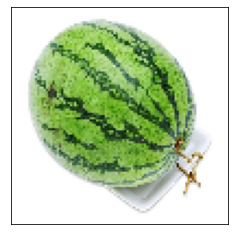

In [20]:
url='../input/duahau-test/duahau.jpg'
img=load_img(url,target_size=(100,100))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

Kiwi


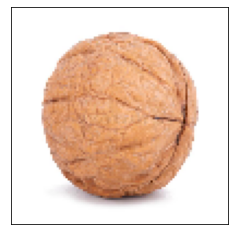

In [21]:
url='../input/walnut-test/walnut.jpg'
img=load_img(url,target_size=(100,100))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

Strawberry


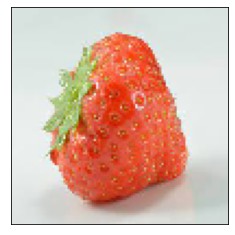

In [22]:
url='../input/dauuu-test/dau.jfif'
img=load_img(url,target_size=(100,100))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])


Strawberry


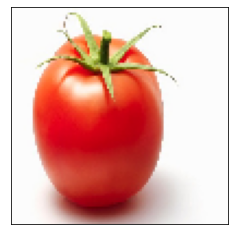

In [23]:
url='../input/tomato-test/cu-qua-trong-tieng-anh6-5904-1489320642.jpg'
img=load_img(url,target_size=(100,100))
plt.imshow(img)
img=img_to_array(img)
plt.xticks([])
plt.yticks([])
img=img.reshape(1,100,100,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

Pear


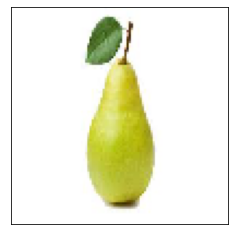

In [24]:
url='../input/quale-test/download.jfif'
img=load_img(url,target_size=(100,100))
plt.imshow(img)
img=img_to_array(img)
plt.xticks([])
plt.yticks([])
img=img.reshape(1,100,100,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

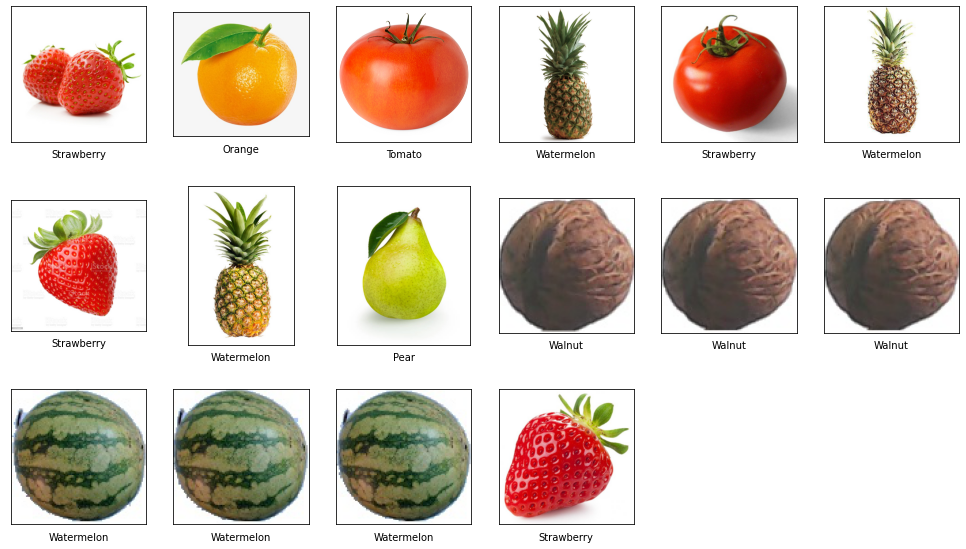

In [26]:
kq={0:"Grape Blue",1:"Kiwi",2:"Orange",3:"Pear",4:"Pineapple",5:"Raspberry",6:"Strawberry",7:"Tomato",8:"Walnut",9:"Watermelon"}
pred = model.predict(test_data)
plt.figure(figsize=(17,17))
for i in range(pred.shape[0]):
  plt.subplot(5,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(load_img(test_data.filepaths[i]))
  plt.xlabel(kq[np.argmax(pred[i])])
plt.show()